<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/gradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot  as plt
from mpl_toolkits import mplot3d

$S_{w,b}(x)= \frac{1}{1 + exp^-(w*x+b)}$ 
This is signmoid for single input x 

In [0]:
def sigmoid(w,b,x):
  return 1/(1 + np.exp(-(w*x + b )))

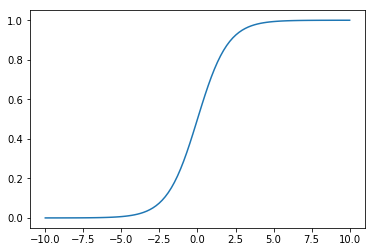

In [64]:
w =1 #@param {type: "slider", min: -2 , max :2 ,step:0.1}
b = 0 #@param {type: "slider", min: -5 , max :5 ,step :0.5}
X = np.linspace(-10,10,100)
Y = sigmoid(w,b,X)
plt.plot(X,Y)
plt.show()

$S_{w1,w2,b}(x1,x2)= \frac{1}{1 + exp ^ -(w1*x1 + w2*x2 + b)}$ 
This is Sigmoid in more than one input variable 

In [0]:
def sigmoid_2d(w1,w2,x1,x2,b):
  return (1/ (1 + np.exp(-(w1*x1 + w2*x2 +b))))

Plotting 3d sigmoid using matplotlib

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1, X2)



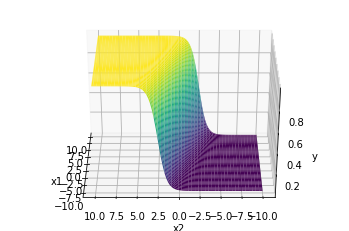

In [94]:
w1 = 0.5 
w2 = 2 
b = 0 
Y = sigmoid_2d(w1,w2,XX1,XX2,b)
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(XX1,XX2,Y, cmap ='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(30,180)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aplha'
  s)


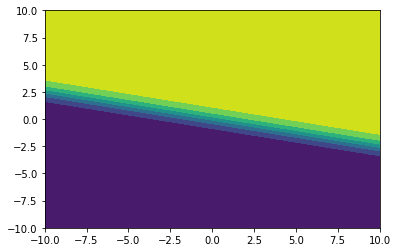

In [96]:
plt.contourf(XX1,XX2,Y,aplha = 0.6)
plt.show()

#Calculating the Loss function
step 1 : to create the valid dataset 
step 2 : iterate and calcualte the loss and estiamte the w mn 

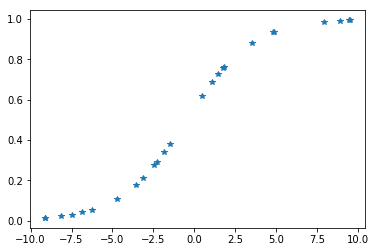

In [68]:
w_unknown = 0.5 
b_unknown = 0.25
X = np.random.random(25)*20-10 #the 20 is for the range of -10 to 10 and subtaction of 10 is to center it to 0
Y = sigmoid(w_unknown, b_unknown, X)
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y - sigmoid(w_est,b_est,x))**2
  return loss

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)
WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i,j],BB[i,j])

    
               
               
  

Text(0.5, 0, 'Loss')

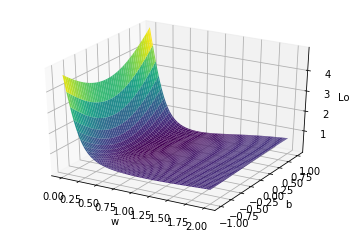

In [86]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(WW,BB,Loss, cmap ='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
#ax.view_init(30,270)

Find the minimum loss indices and corresponding W and B

In [91]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

print(i,j)
print(WW[i,j])
print(BB[i,j])

62 25
0.5050505050505051
0.2525252525252526


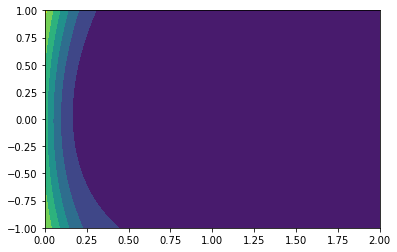

In [97]:
plt.contourf(WW,BB,Loss)
plt.show()

In [0]:
class SigmoidNeuron : 
  
  def __init__(self):
    self.w = None 
    self.b = None 
  
  def perceptron ( self, x) :
    return (np.dot(x,self.w.T)+ self.b)
  
  def sigmoid(self,x):
    return (1 / (1  + np.exp(-x)))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred-y)*y_pred*(1-y_pred)*x)
  
  def grad_b(self,x,y): 
    y_pred = self.sigmoid(self.perceptron(x))
    return((y_pred-y)*y_pred*(1-y_pred))
  
  def fit(self, X ,Y ,epochs = 1, learning_rate =1 , initialise = False ): 
      if (initialise):
        #initialize the weights 
        self.w = np.random.randn(1, X.shape[1])
        self.b = 0
      for i in range(epochs):
        dw = 0 
        db = 0
        for x,y in zip(X,Y):
          dw += self.grad_w(x,y)
          db += self.grad_b(x,y)
        
        self.w -= learning_rate * dw 
        self.b -= learning_rate * db
        

Testing withthe Toy data 

In [0]:
def plot_sn(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j],X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,alpha =0.6)
  ax.scatter(X[:,0],X[:,1], c =Y)
  ax.plot()

[[ 1.00106977 -1.49535041]] [0.00574617]
[[ 1.09457442 -1.39313483]] [0.03519679]
[[ 1.20206786 -1.27084154]] [0.06478415]
[[ 1.31083224 -1.13548879]] [0.08426048]
[[ 1.41127919 -0.98916047]] [0.08290458]
[[ 1.50694113 -0.82646079]] [0.05982422]
[[ 1.58841475 -0.6786533 ]] [0.0276617]
[[ 1.6355748  -0.60273257]] [0.00166492]
[[ 1.66151979 -0.57849611]] [-0.02078711]
[[ 1.67988549 -0.57352964]] [-0.04212009]
[[ 1.6954798  -0.57482203]] [-0.06262513]
[[ 1.70983294 -0.57808958]] [-0.08234258]
[[ 1.72345659 -0.58194085]] [-0.10130855]
[[ 1.73654061 -0.58591357]] [-0.11956404]
[[ 1.74916812 -0.58985117]] [-0.13715035]


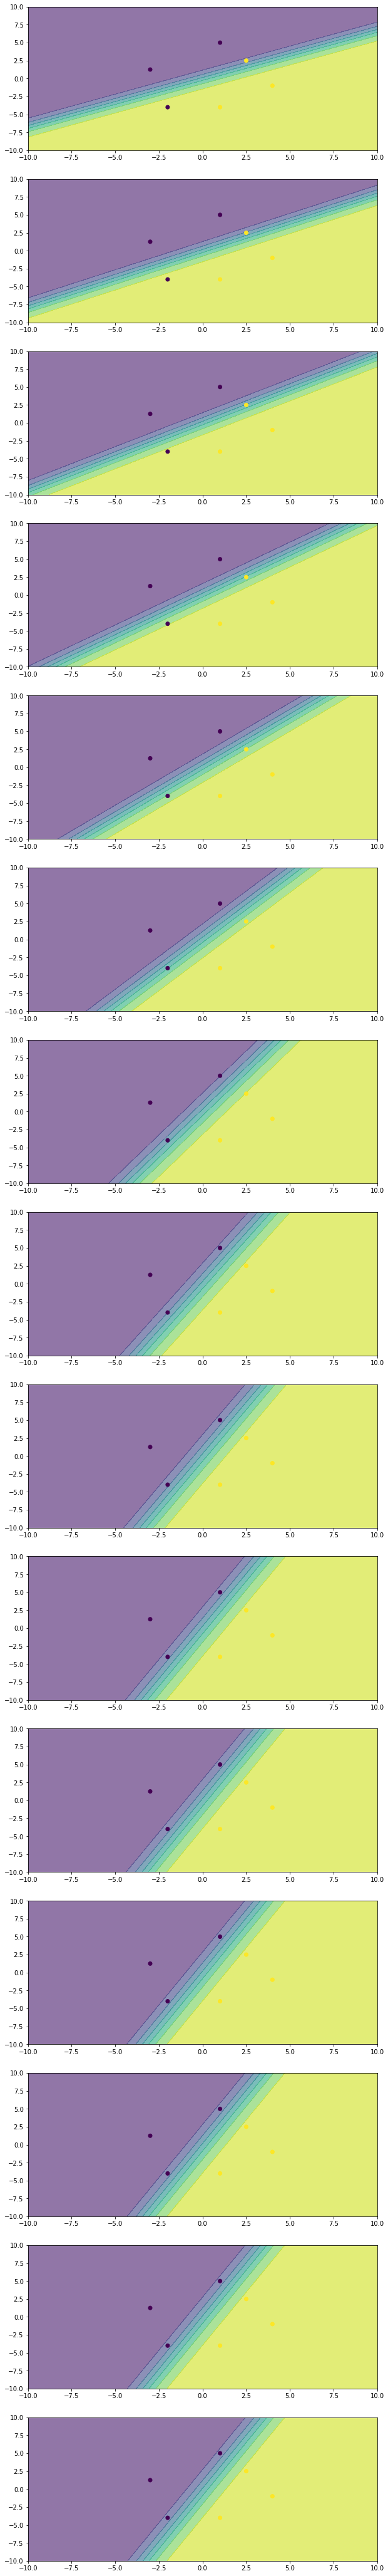

In [38]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.05,True)
N =15
plt.figure(figsize =(10,N*5))

#no initializing the weights 
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1 , i + 1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.25,False)

In [0]:
def error(w, b,X, Y) :
  err_factor = 0.0 
  for x, y in zip(X,Y):
    fx = sigmoid(w,b,x)
    err_factor += 0.5 * (fx - y)**2 
  return err_factor  


In [0]:
def grad_w(w,b,x,y):
  fx = sigmoid(w,b,x)
  return ((fx- y )* fx*(1-fx)*x)

In [0]:
def grad_b(w,b,x,y):
  fx = sigmoid (w,b,x)
  return ((fx-y)*fx*(1-fx))

In [0]:
def gradient_descent():
  w, b, eta = -2, -2, 1.0 
  max_epochs = 10 
  
  for i in range(max_epochs):
    dw, db = 0, 0
    err.append(error(w,b,X,Y))
    print(err[i])
    plt.show()
    for x, y in zip(X,Y):
      dw = grad_w(w,b,x,y)
      db = grad_b(w,b,x,y)
    w = w + eta * dw 
    b = b + eta * db
    

In [76]:
gradient_descent()

NameError: ignored